In [51]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
df=pd.read_csv("data.csv",usecols=[1,2])
df.head()

,f1,f2
0,2.605097,1.225296
1,0.532377,3.313389
2,0.802314,4.381962
3,0.528537,4.497239
4,2.618585,0.357698


<Axes: xlabel='f1', ylabel='f2'>

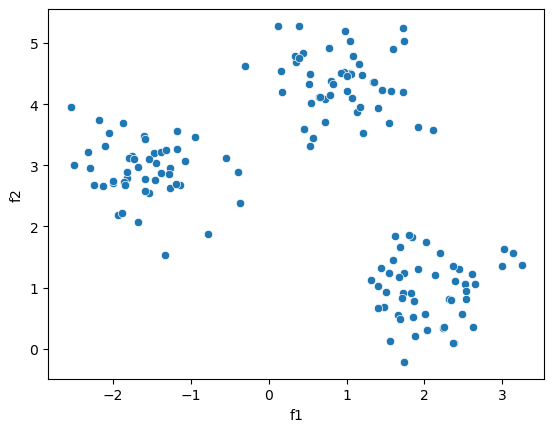

In [53]:
sns.scatterplot(x=df.f1,y=df.f2)

# Build model

In [54]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


In [55]:
distortions=[]
K=range(1,8)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df)
    distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

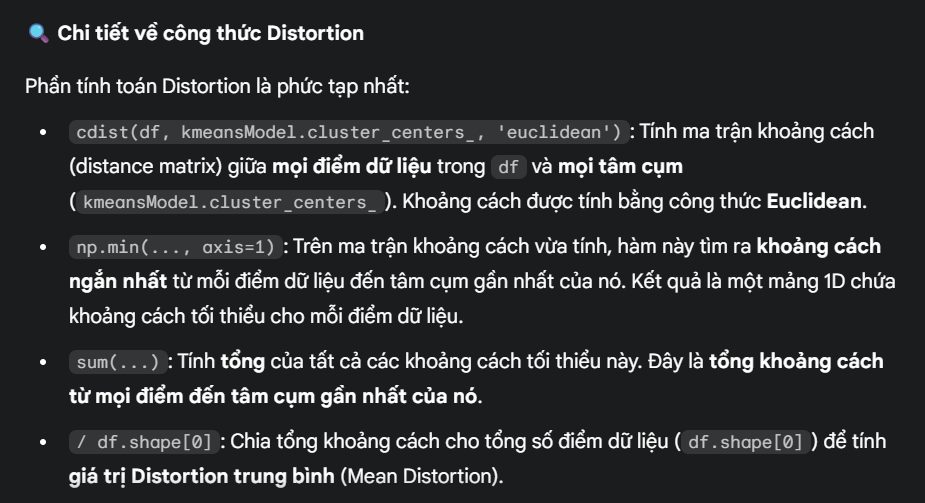

- Nếu có 2 điểm 1,2 có tọa độ (x1,y1),(x2,y2) và các tâm cụm A,B có tọa độ (xA,yA),(xB,yB) thì cdist sẽ tạo ra ma trận
kce: khoảng cách euclide  
kce(1,A) kce(1,B)  
kce(2,A) kce(2,B)  
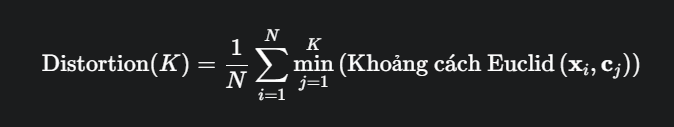

<Axes: >

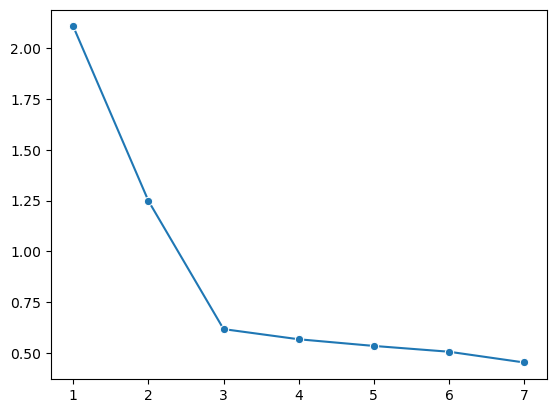

In [56]:
sns.lineplot(x=K,y=distortions,marker='o')

- chọn k=3

In [57]:
model_k=KMeans(n_clusters=3).fit(df)

c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


- lấy tâm cụm
- xem các điểm dữ liệu thuộc cụm nào

In [58]:
# tâm cụm
centroids=model_k.cluster_centers_
# xem dữ liệu thuộc cụm nào
labels=model_k.labels_
centroids, labels

(array([[-1.5947298 ,  2.92236966],
        [ 0.9329651 ,  4.35420712],
        [ 2.06521743,  0.96137409]]),
 array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
        1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
        2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
        0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
        0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
        2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2], dtype=int32))

In [59]:
df["group"]=labels
df.head()

,f1,f2,group
0,2.605097,1.225296,2
1,0.532377,3.313389,1
2,0.802314,4.381962,1
3,0.528537,4.497239,1
4,2.618585,0.357698,2


<Axes: xlabel='f1', ylabel='f2'>

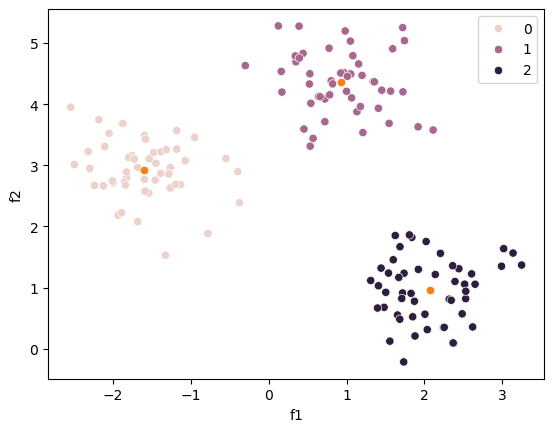

In [64]:
sns.scatterplot(x=df.f1,y=df.f2,data=df,hue="group")
sns.scatterplot(x=centroids[:,0],y=centroids[:,1])